In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df  = pd.read_csv(r"/content/drive/MyDrive/mncorp/joint_data.csv")

In [ ]:
df.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,class,pred_scores,cred_scores
0,0,67,male,2,own,little,little,1169,6,radio/TV,0,0.992690,68.0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,0,0.532496,58.0
2,2,49,male,1,own,little,little,2096,12,education,0,0.895028,68.0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0,0.993368,55.0
4,4,53,male,2,free,little,little,4870,24,car,0,0.009796,65.0


In [ ]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration,class,pred_scores,cred_scores
count,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,465.000000,1000.000000
mean,758.500000,35.654809,1.971014,2857.129117,19.444664,0.500000,0.515701,65.752000
std,438.353168,10.980450,0.620845,2428.448300,10.894316,0.500165,0.366927,5.044992
min,0.000000,19.000000,0.000000,250.000000,4.000000,0.000000,0.000029,46.000000
25%,379.250000,27.000000,2.000000,1339.250000,12.000000,0.000000,0.115981,63.000000
50%,758.500000,33.000000,2.000000,2100.500000,18.000000,0.500000,0.618602,67.000000
75%,1137.750000,41.000000,2.000000,3430.000000,24.000000,1.000000,0.836816,68.000000
max,1517.000000,75.000000,3.000000,18424.000000,72.000000,1.000000,0.999895,80.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'class',
       'pred_scores', 'cred_scores'],
      dtype='object')

Data interpretation and visualisation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
!pip install plotly
import plotly.offline as py 
import plotly.graph_objs as go
import plotly.express as px
from collections import Counter  
from subprocess import call
from IPython.display import Image

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1518 non-null   int64  
 1   Age               1518 non-null   int64  
 2   Sex               1518 non-null   object 
 3   Job               1518 non-null   int64  
 4   Housing           1518 non-null   object 
 5   Saving accounts   1518 non-null   object 
 6   Checking account  1518 non-null   object 
 7   Credit amount     1518 non-null   int64  
 8   Duration          1518 non-null   int64  
 9   Purpose           1518 non-null   object 
 10  class             1518 non-null   int64  
 11  pred_scores       465 non-null    float64
 12  cred_scores       1000 non-null   float64
dtypes: float64(2), int64(6), object(5)
memory usage: 154.3+ KB


In [ ]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,class,pred_scores,cred_scores
0,0,67,male,2,own,little,little,1169,6,radio/TV,0,0.992690,68.0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,0,0.532496,58.0
2,2,49,male,1,own,little,little,2096,12,education,0,0.895028,68.0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0,0.993368,55.0
4,4,53,male,2,free,little,little,4870,24,car,0,0.009796,65.0


In [ ]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration,class,pred_scores,cred_scores
count,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,465.000000,1000.000000
mean,758.500000,35.654809,1.971014,2857.129117,19.444664,0.500000,0.515701,65.752000
std,438.353168,10.980450,0.620845,2428.448300,10.894316,0.500165,0.366927,5.044992
min,0.000000,19.000000,0.000000,250.000000,4.000000,0.000000,0.000029,46.000000
25%,379.250000,27.000000,2.000000,1339.250000,12.000000,0.000000,0.115981,63.000000
50%,758.500000,33.000000,2.000000,2100.500000,18.000000,0.500000,0.618602,67.000000
75%,1137.750000,41.000000,2.000000,3430.000000,24.000000,1.000000,0.836816,68.000000
max,1517.000000,75.000000,3.000000,18424.000000,72.000000,1.000000,0.999895,80.000000


Descriptive interprataion

In [ ]:
SA = df.loc[:,['Sex','Age']]
fig = px.box(SA, x="Sex", y="Age", points="all",color="Sex")
fig.update_layout(
    title={
          'text':"Sex Vs Age Cross tabulation",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Sex",
    yaxis_title="Age",
   
)
fig.show()


In [ ]:
Purpose = df['Purpose']
fig = px.histogram(df, x="Purpose", color="Purpose")
fig.update_layout(
    title={
          'text':"Purpose breakdown",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
   
)
fig.show()

In [ ]:

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

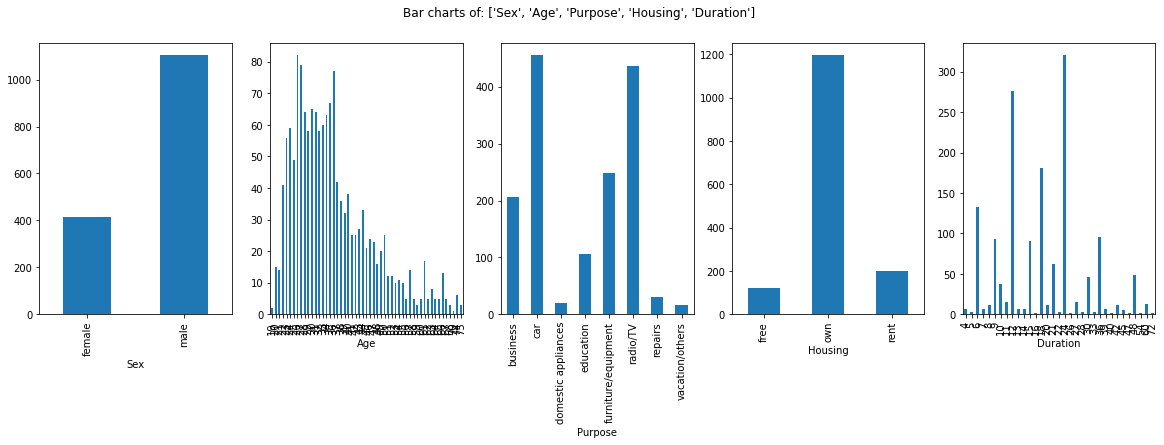

In [ ]:
# Calling the function for plotting
PlotBarCharts(inpData=df, 
              colsToPlot=['Sex', 'Age', 'Purpose','Housing','Duration'])

These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated.

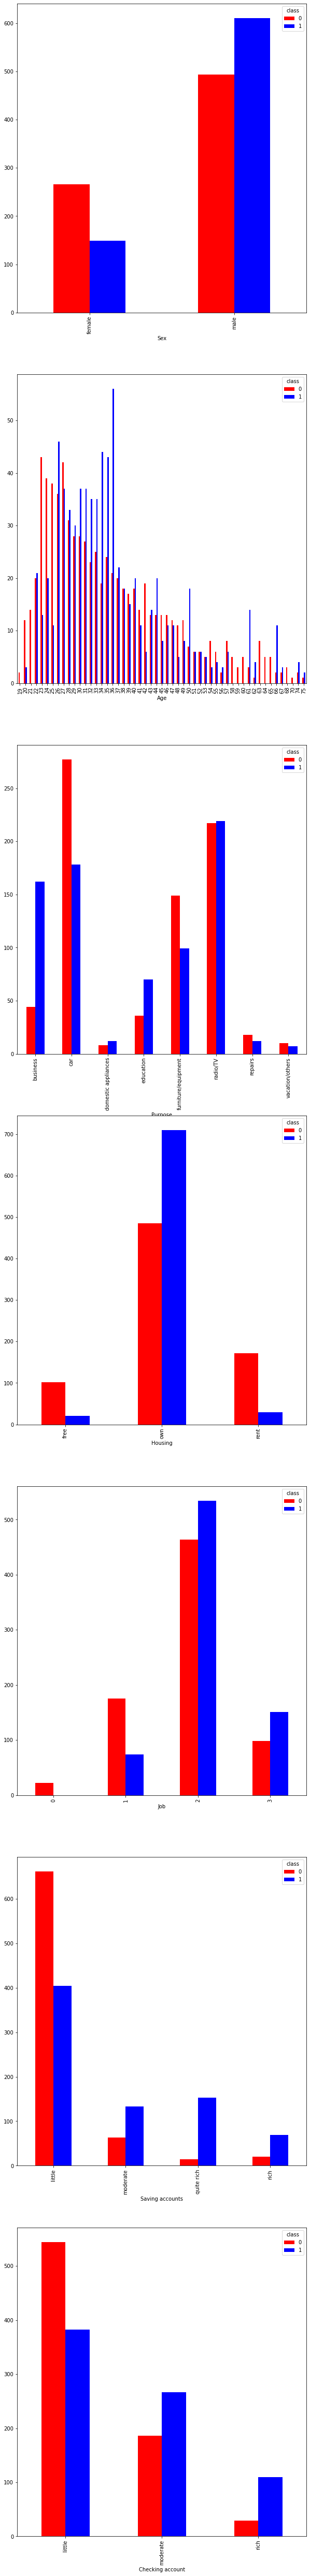

In [ ]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Sex', 'Age', 'Purpose','Housing','Job','Saving accounts', 'Checking account']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=df[CategoricalCol], columns=df['class'])
    CrossTabResult.plot.bar(color=['red','blue'], ax=PlotCanvas[i])

In [ ]:
import ipywidgets as widgets
# Create dimensions
#0-bad credit
#1-good credit
gender_dim = go.parcats.Dimension(values=df.Sex, label="Sex")
Housing_dim = go.parcats.Dimension(values=df.Housing, label="Housing")
#Saving_accounts_dim = go.parcats.Dimension(values=df['Saving accounts'], label="Saving accounts")
Checking_account_dim = go.parcats.Dimension(values=df['Checking account'], label="Checking account")
Purpose_dim = go.parcats.Dimension(values=df.Purpose, label="Purpose")
class_dim = go.parcats.Dimension(values=df["class"], label="class")
# Create parcats trace
color = np.zeros(len(df), dtype='uint8')

fig = go.Figure(data = [go.Parcats(dimensions=[gender_dim, Housing_dim,Checking_account_dim,Purpose_dim],
        hoveron='color', hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='freeform')])

fig.show()

In [ ]:
PC =df.loc[:,['Purpose','Credit amount','class']]
fig = go.Figure()

fig.add_trace(go.Violin(x=PC['Purpose'][ PC['class'] == 1 ],
                        y=PC['Credit amount'][  PC['class'] == 1 ],
                        legendgroup='good', scalegroup='good', name='good',
                        side='negative',
                        line_color='green')
             )
fig.add_trace(go.Violin(x=PC['Purpose'][ PC['class'] == 0 ],
                        y=PC['Credit amount'][  PC['class'] == 0 ],
                        legendgroup='bad', scalegroup='bad', name='bad',
                        side='positive',
                        line_color='yellow')
             )
fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0, violinmode='overlay')
fig.update_layout(
    title={
          'text':"Purpose Vs Credit Amount Cross tabulation",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Purpose",
    yaxis_title="Credit amount",
   
)
fig.show()

Using ANOVA test



In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def Anova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [ ]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=[ 'Credit amount', 'Duration', 'Age']
Anova(inpData=df, TargetVariable='class', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Credit amount is correlated with class | P-Value: 7.200145270587697e-39
Duration is correlated with class | P-Value: 5.391802796543306e-25
Age is NOT correlated with class | P-Value: 0.18283306262775118


['Credit amount', 'Duration']

Chi-Square test is conducted to check the correlation between two categorical variables

Assumption(H0): The two columns are NOT related to each other
Result of Chi-Sq Test: The Probability of H0 being True


In [ ]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def Chisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [ ]:
CategoricalVariables=[ 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Credit amount', 'Duration', 'Purpose','Age']

# Calling the function
Chisq(inpData=df, 
              TargetVariable='class',
              CategoricalVariablesList= CategoricalVariables)

Age is correlated with class | P-Value: 1.2829678647038004e-14
Sex is correlated with class | P-Value: 2.3880165043218323e-11
Job is correlated with class | P-Value: 4.650046482074868e-17
Housing is correlated with class | P-Value: 1.5849340447438676e-43
Saving accounts is correlated with class | P-Value: 5.166746587812822e-49
Checking account is correlated with class | P-Value: 2.825355595595161e-20
Credit amount is correlated with class | P-Value: 2.5975706051945845e-26
Duration is correlated with class | P-Value: 4.3020460817409787e-26
Purpose is correlated with class | P-Value: 2.577981648264334e-21


['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose']

In [ ]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'class', 'pred_scores'],
      dtype='object')

Data-preprocessing and manipulation

Assigning point based on attributes


In [ ]:
df['Sex'] = np.where((df.Sex == 'male'),3,df.Sex)

In [ ]:
df['Sex'] = np.where((df.Sex == 'female'),2,df.Sex)

In [ ]:
df['Job'].mask(df['Job'] == 3, 10, inplace=True)

In [ ]:
df['Job'].mask(df['Job'] == 2, 7, inplace=True)

In [ ]:
df['Job'].mask(df['Job'] == 1, 5, inplace=True)

In [ ]:
df['Job'].mask(df['Job'] == 0, 0, inplace=True)

In [ ]:
df['Housing'].mask(df['Housing'] == 'own', 10, inplace=True)

In [ ]:
df['Housing'].mask(df['Housing'] == 'free', 7, inplace=True)

In [ ]:
df['Housing'].mask(df['Housing'] == 'rent', 5, inplace=True)

In [ ]:
df['Saving accounts'].mask(df['Saving accounts'] == 'little', 4, inplace=True)

In [ ]:
df['Saving accounts'].mask(df['Saving accounts'] == 'moderate', 5, inplace=True)

In [ ]:
df['Saving accounts'].mask(df['Saving accounts'] == 'rich', 7, inplace=True)

In [ ]:
df['Saving accounts'].mask(df['Saving accounts'] == 'quite rich', 10, inplace=True)

In [ ]:
df['Checking account'].mask(df['Checking account'] == 'little', 4, inplace=True)

In [ ]:
df['Checking account'].mask(df['Checking account'] == 'moderate', 5, inplace=True)

In [ ]:
df['Checking account'].mask(df['Checking account'] == 'rich', 7, inplace=True)

In [ ]:
df['Checking account'].mask(df['Checking account'] == 'quite rich', 10, inplace=True)

In [ ]:
df.loc[df['Credit amount'] <= 5000, 'Credit amount'] = 20

In [ ]:
df['Credit amount'] = np.where(df['Credit amount'].between(5000,10000), 15, df['Credit amount'])

In [ ]:
df.loc[df['Credit amount'] >10000, 'Credit amount'] = 10

In [ ]:
df.loc[df['Duration'] <=24, 'Duration'] = 15

In [ ]:
df['Duration'] = np.where(df['Duration'].between(24,60), 10, df['Duration'])

In [ ]:
df.loc[df['Duration'] >=60 , 'Duration'] = 5

In [ ]:
df['Purpose']=df['Purpose'].replace(to_replace ="business",
                 value =10)

In [ ]:
df['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
10                      97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

In [ ]:
df['Purpose']=df['Purpose'].replace(to_replace ="education",
                 value =7)

In [ ]:
df['Purpose']=df['Purpose'].replace(to_replace ="car",
                 value =5)

In [ ]:
df['Purpose']=df['Purpose'].replace(to_replace ="radio/TV",
                 value =5)

In [ ]:
df['Purpose']=df['Purpose'].replace(to_replace ="repairs",
                 value =5)

In [ ]:
df['Purpose']=df['Purpose'].replace(to_replace ="domestic appliances",
                 value =5)

In [ ]:
df['Purpose']=df['Purpose'].replace(to_replace ="vacation/others",
                 value =5)

In [ ]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,3,7,10,4,4,20,15,5
1,1,22,2,7,10,4,5,15,10,5
2,2,49,3,5,10,4,4,20,15,7
3,3,45,3,7,7,4,4,15,10,furniture/equipment
4,4,53,3,7,7,4,4,20,15,5


In [ ]:
df['Checking account'].isnull().sum()

0

In [ ]:

df=df.drop(columns=[str(df.columns[0])])

In [ ]:
import pandas as pd
df_rated=pd.read_csv('/content/drive/MyDrive/mncorp/mncorp_rated - mncorp_rated.csv')



In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,cred_scores,class
0,67,male,2,own,little,little,1169,6,radio/TV,68,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,58,0
2,49,male,1,own,little,little,2096,12,education,68,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,55,0
4,53,male,2,free,little,little,4870,24,car,65,0


In [ ]:
df_rated.columns

Index(['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'cred_scores'],
      dtype='object')

In [ ]:
#reading original data

df  = pd.read_csv(r"/content/drive/MyDrive/mncorp_assignments/data_fs.csv")

In [ ]:
df['cred_scores']= df_rated['cred_scores']

In [ ]:
df['Saving accounts'].fillna(df['Saving accounts'].mode()[0], inplace=True)


In [ ]:
df['Checking account'].fillna(df['Checking account'].mode()[0], inplace=True)


In [ ]:
conds = [df["cred_scores"] >68  , df["cred_scores"] <= 68]
choices = [1,0]
df["class"]=np.select(conds, choices)


In [ ]:
del df[df.columns[0]]

In [ ]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'cred_scores', 'class'],
      dtype='object')

In [ ]:
#df.to_csv("/content/drive/MyDrive/mncorp/joint_data.csv")

Now apply Ml algorithm and concepts

balancing the class


In [ ]:
df["class"].value_counts()

0    759
1    241
Name: class, dtype: int64

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df["class"]==0]
df_minority = df[df["class"]==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=759,    # to match majority class
                                 random_state=123) # reproducible results



# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df=df_upsampled
df["class"].value_counts()

1    759
0    759
Name: class, dtype: int64

Assumption of class credit type
1-good credits
0-bad_credits

In [ ]:
df.drop(columns={"cred_scores"},axis=1,inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


cat_features = ['Sex','Housing', 'Saving accounts', 'Checking account','Purpose']
num_features=['Age', 'Job', 'Credit amount', 'Duration','class']
for variable in cat_features:
    dummies = pd.get_dummies(df[cat_features])
    df1= pd.concat([df[num_features], dummies],axis=1)



target_class= df1['class']          
df2=df1.drop(['class'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(df2,target_class,test_size=0.20,random_state = 30)

# TRANSFORMATION
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


# define model
logreg = LogisticRegression()
# fit the model with data
logreg.fit(x_train,y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Saving this final data for reference during deployment
df1.to_pickle('df1.pkl')

In [ ]:

#finding probabilies of being a defaulter
probs = logreg.predict_proba(x_test)  



In [ ]:
probs=pd.DataFrame(probs)
prob1=probs.iloc[:,1]# taking probability for good credits

probs=pd.DataFrame(prob1)

#Keep Probabilities of the positive class only.
probs.columns = ['p_d'] #renaming column

appending pred scores to original data

In [ ]:
df['pred_scores']= probs['p_d']

In [ ]:
#df.to_csv("/content/drive/MyDrive/mncorp/scored_data.csv")


In [ ]:
probs

,p_d
0,0.992690
1,0.532496
2,0.895028
3,0.993368
4,0.009796
...,...
299,0.337254
300,0.999473
301,0.930307
302,0.749336


In [ ]:
y_pred = probs['p_d'].apply(lambda x: 1 if x > 0.60 else 0)


In [ ]:
y_test

81     1
404    1
790    1
502    1
170    0
      ..
894    0
506    1
970    1
555    1
301    0
Name: class, Length: 304, dtype: int64

In [ ]:
y_pred.value_counts()

0    156
1    148
Name: p_d, dtype: int64

In [ ]:
# actual vs pred:
#-- actual:
y_test.value_counts()

1    154
0    150
Name: class, dtype: int64

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[141,   9],
       [ 15, 139]])

In [ ]:
#ROC curve- Compute the AUC Score.
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, probs)  
print('AUC: %.2f' % auc) 

AUC: 0.98


In [ ]:
#Get the ROC Curve.
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

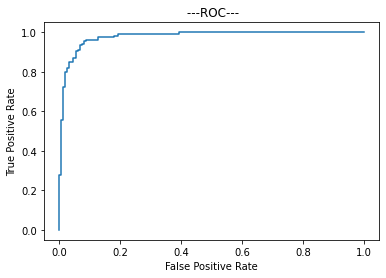

In [ ]:
#Plot ROC Curve using our defined function
import matplotlib.pyplot as plt

plt.title(" ---ROC---")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr) 

In [ ]:
# precision accuracy recall

accu=(metrics.accuracy_score(y_test, y_pred))

precision=metrics.precision_score(y_test, y_pred)*100
recall=metrics.recall_score(y_test, y_pred)*100
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9210526315789473
Precision: 0.9391891891891891
Recall: 0.9025974025974026


In [ ]:
#F1 score

data=[precision , recall]
import statistics as st
F1_cal=st.harmonic_mean(data)
print("F1_SCORE :", F1_cal)

F1_SCORE : 92.05298013245033


In [ ]:
# Gini Score--

(2*auc)-1

0.9561904761904763

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithmd
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [ ]:
print(logreg)
print(metrics.classification_report(y_test, y_pred))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       150
           1       0.94      0.90      0.92       154

    accuracy                           0.92       304
   macro avg       0.92      0.92      0.92       304
weighted avg       0.92      0.92      0.92       304



In [ ]:
# SAVING TRAINED MODEL
# save the model 
import pickle
filename = 'LOGREG_260521_model.sav'
pickle.dump(logreg, open(filename, 'wb'))

In [ ]:
1--good_cred
0--bad_cred

Checking with decision tree model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       150
           1       0.83      0.84      0.83       154

    accuracy                           0.83       304
   macro avg       0.83      0.83      0.83       304
weighted avg       0.83      0.83      0.83       304

[[124  26]
 [ 25 129]]
Accuracy of the model on Testing Sample Data: 0.83

Accuracy values for 10-fold Cross Validation:
 [0.84207792 0.87499459 0.80920227 0.77596671 0.86842105 0.82882883
 0.8222992  0.8748646  0.87386228 0.84028873]

Final Average

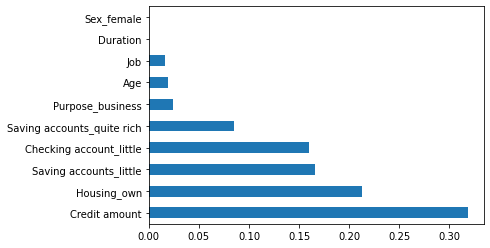

In [ ]:
#Decision Trees
from sklearn import tree
# choose from different tunable hyper parameters
# Choose various values of max_depth and criterion for tuning the model
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(x_train,y_train)
prediction=DTree.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=df2.columns)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, df2 , target_class, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [119]:
df2.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_little',
       'Checking account_moderate', 'Checking account_rich',
       'Purpose_business', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others'],
      dtype='object')

Deployment of the Model
Based on the above trials we select that algorithm which produces the best average accuracy.

between logistic regression and decision trees , DT tress is performing better

In order to deploy the model we follow below steps

Train the model using 100% data available
Save the model as a serialized file which can be stored anywhere
Create a python function which gets integrated with front-end(Tableau) to take all the inputs and returns the prediction

In [ ]:
#retraining model with all data
x=df2
y=target_class

#Decision Trees
from sklearn import tree
# choose from different tunable hyper parameters
# Choose various values of max_depth and criterion for tuning the model
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on full data available Data
final_DTree=clf.fit(x,y)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(final_DTree, x , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.84207792 0.87499459 0.80920227 0.77596671 0.86842105 0.82882883
 0.8222992  0.8748646  0.87386228 0.84028873]

Final Average Accuracy of the model: 0.84


In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('final_DTree.pkl', 'wb') as fileWriteStream:
    pickle.dump(final_DTree, fileWriteStream)
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content
